# Model Training

## Thyroid Disease Detection: Single Input Prediction

In [129]:
import pandas as pd
import numpy as np
import pickle

import warnings
warnings.filterwarnings("ignore")

In [130]:
data = pd.read_csv("C:\\Users\\sunny\\Downloads\\Gait dataset 2.csv")
data.head()

,Age,Gender,StrideLength,StrideDuration,GaitCondition
0,45,Male,70,1.2,Normal
1,55,Male,75,1.8,Hypotonic
2,50,Female,72,1.1,Normal
3,60,Male,65,1.1,Hypertonic
4,35,Male,70,1.3,Normal


In [131]:
data.columns

Index(['Age', 'Gender', 'StrideLength', 'StrideDuration', 'GaitCondition'], dtype='object')

In [133]:
selected_col = ['Age', 'Gender', 'StrideLength', 'StrideDuration', 'GaitCondition']

In [134]:
df = data.copy()

df = df[selected_col]

In [135]:
df.head(20)

,Age,Gender,StrideLength,StrideDuration,GaitCondition
0,45,Male,70,1.2,Normal
1,55,Male,75,1.8,Hypotonic
2,50,Female,72,1.1,Normal
3,60,Male,65,1.1,Hypertonic
4,35,Male,70,1.3,Normal
5,40,Female,67,1.4,Hypertonic
6,65,Male,75,1.0,Normal
7,48,Female,64,1.7,Hypertonic
8,58,Male,71,1.2,Normal
9,42,Female,66,1.5,Hypotonic


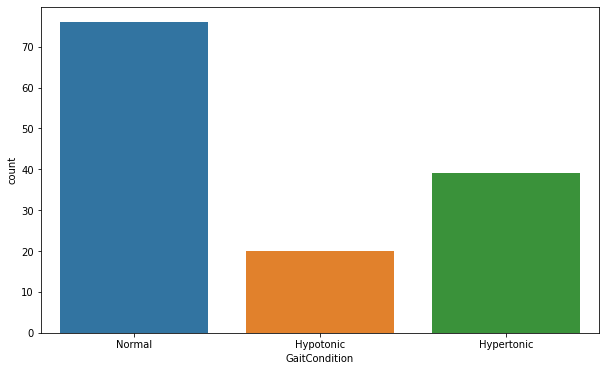

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(df['GaitCondition'])
plt.show()

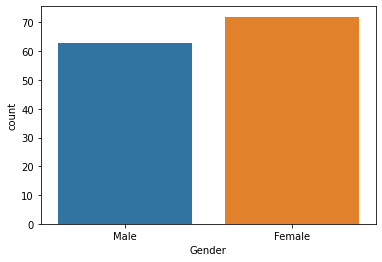

In [137]:
sns.countplot(df['Gender'])

plt.show()

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             135 non-null    int64  
 1   Gender          135 non-null    object 
 2   StrideLength    135 non-null    int64  
 3   StrideDuration  135 non-null    float64
 4   GaitCondition   135 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 5.4+ KB


# Checking number of invalid value like '?' present in each column


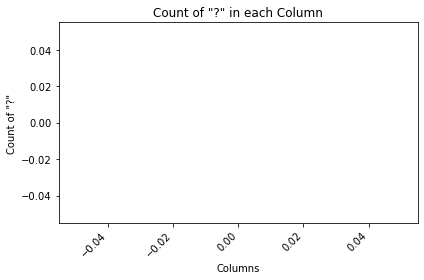

In [10]:
import matplotlib.pyplot as plt

# Your existing code
for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count != 0:
        print(column, count)

# Create lists to store column names and their corresponding counts
columns_with_question = []
question_counts = []

# Iterate over columns again to populate lists
for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count != 0:
        columns_with_question.append(column)
        question_counts.append(count)

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(columns_with_question, question_counts, color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Count of "?"')
plt.title('Count of "?" in each Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Now let's replace the '?' values with numpy nan

In [11]:
for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count!=0:
        df[column] = df[column].replace('?',np.nan)

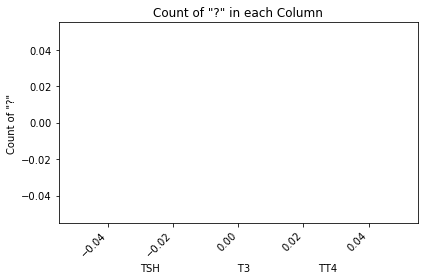

In [12]:
import matplotlib.pyplot as plt

# Your existing code
for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count != 0:
        print(column, count)

# Create lists to store column names and their corresponding counts
columns_with_question = []
question_counts = []

# Iterate over columns again to populate lists
for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count != 0:
        columns_with_question.append(column)
        question_counts.append(count)

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(columns_with_question, question_counts, color='skyblue')
plt.xlabel('TSH                         T3                      TT4')
plt.ylabel('Count of "?"')
plt.title('Count of "?" in each Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
# lets check "?" present in every columns

for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count==0:
        print(column, count)

Age 0
Gender 0
Stride length (cm) 0
Stride Duration(s) 0
Gait Condition 0


In [139]:
df.head(19)

,Age,Gender,StrideLength,StrideDuration,GaitCondition
0,45,Male,70,1.2,Normal
1,55,Male,75,1.8,Hypotonic
2,50,Female,72,1.1,Normal
3,60,Male,65,1.1,Hypertonic
4,35,Male,70,1.3,Normal
5,40,Female,67,1.4,Hypertonic
6,65,Male,75,1.0,Normal
7,48,Female,64,1.7,Hypertonic
8,58,Male,71,1.2,Normal
9,42,Female,66,1.5,Hypotonic


# Null Values Imputation

In [15]:
df.isnull().sum()

Age                   0
Gender                0
Stride length (cm)    0
Stride Duration(s)    0
Gait Condition        0
dtype: int64

### Since the values are categorical, we have to change them to numerical before we use any imputation techniques.

In [140]:
# In sex column, map 'F' to 0 and 'M' to 1
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

# For all other binary categorical columns, map 'f' to 0 and 't' to 1
for column in df.columns:
    unique_values = df[column].unique()
    if len(unique_values) == 2 and 'f' in unique_values and 't' in unique_values:
        df[column] = df[column].map({'f': 0, 't': 1})
# this will map all the rest of the columns as we require.

In [141]:
df.head()

,Age,Gender,StrideLength,StrideDuration,GaitCondition
0,45,1,70,1.2,Normal
1,55,1,75,1.8,Hypotonic
2,50,0,72,1.1,Normal
3,60,1,65,1.1,Hypertonic
4,35,1,70,1.3,Normal


In [142]:
# target class

df["GaitCondition"].value_counts()

Normal        76
Hypertonic    39
Hypotonic     20
Name: GaitCondition, dtype: int64

In [143]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder().fit(df['GaitCondition'])

df['GaitCondition'] = encoder.transform(df['GaitCondition'])

# we will save the encoder as pickle to use when we do the prediction. We will need to decode the predcited values
# back to original

file = "encoder.pickle"
pickle.dump(encoder, open(file, "wb"))

In [144]:
df.head()

,Age,Gender,StrideLength,StrideDuration,GaitCondition
0,45,1,70,1.2,2
1,55,1,75,1.8,1
2,50,0,72,1.1,2
3,60,1,65,1.1,0
4,35,1,70,1.3,2


In [145]:
# Mapping between numeric values and original classes
class_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Displaying the mapping
print("Class Mapping:")
for class_name, numeric_value in class_mapping.items():
    print(f"{numeric_value}: {class_name}")


Class Mapping:
0: Hypertonic
1: Hypotonic
2: Normal


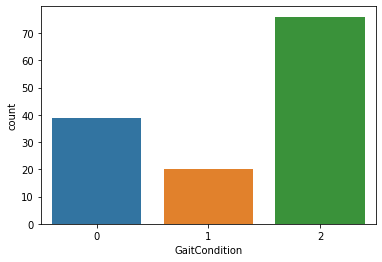

In [146]:
sns.countplot(df['GaitCondition'])
plt.show()

In [147]:
df.head(20)

,Age,Gender,StrideLength,StrideDuration,GaitCondition
0,45,1,70,1.2,2
1,55,1,75,1.8,1
2,50,0,72,1.1,2
3,60,1,65,1.1,0
4,35,1,70,1.3,2
5,40,0,67,1.4,0
6,65,1,75,1.0,2
7,48,0,64,1.7,0
8,58,1,71,1.2,2
9,42,0,66,1.5,1


### Now that we have encoded all our Categorical values. Let's start with imputing the missing values.

In [148]:
import sklearn.impute

imputer=sklearn.impute.KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(df) # impute the missing values

# convert the nd-array returned in the step above to a Dataframe
new_df=pd.DataFrame(data=np.round(new_array), columns=df.columns)

In [149]:
new_df.isnull().sum()

Age               0
Gender            0
StrideLength      0
StrideDuration    0
GaitCondition     0
dtype: int64

# Count plot for target class

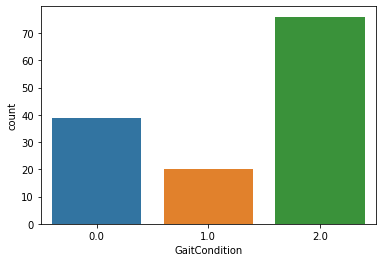

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(new_df['GaitCondition'])
plt.show()

### We can clerly see that the dataset is highly imbalanced.

- We will use a python library known as imbalanced-learn to deal with imbalanced data. Imbalanced learn has an algorithm called RandomOverSampler.

In [152]:
from imblearn.over_sampling import SMOTENC,RandomOverSampler

In [154]:
from imblearn.over_sampling import RandomOverSampler

# Assuming 'new_df' contains your dataset and 'Class' is the target variable
x = new_df.drop(['GaitCondition'], axis=1)
y = new_df['GaitCondition']

# Instantiate the RandomOverSampler
rdsmple = RandomOverSampler()

# Resample the dataset
x_sampled, y_sampled = rdsmple.fit_resample(x, y)

# Now, x_sampled and y_sampled contain the oversampled data


In [155]:
x_sampled.values

array([[45.,  1., 70.,  1.],
       [55.,  1., 75.,  2.],
       [50.,  0., 72.,  1.],
       [60.,  1., 65.,  1.],
       [35.,  1., 70.,  1.],
       [40.,  0., 67.,  1.],
       [65.,  1., 75.,  1.],
       [48.,  0., 64.,  2.],
       [58.,  1., 71.,  1.],
       [42.,  0., 66.,  2.],
       [55.,  0., 64.,  2.],
       [70.,  1., 68.,  1.],
       [72.,  0., 67.,  1.],
       [66.,  1., 70.,  1.],
       [38.,  0., 65.,  2.],
       [59.,  0., 72.,  1.],
       [68.,  1., 63.,  2.],
       [45.,  1., 68.,  1.],
       [46.,  0., 67.,  1.],
       [76.,  1., 75.,  1.],
       [58.,  0., 64.,  2.],
       [54.,  1., 71.,  1.],
       [45.,  1., 66.,  2.],
       [43.,  0., 64.,  2.],
       [39.,  0., 68.,  1.],
       [69.,  0., 67.,  1.],
       [37.,  0., 65.,  1.],
       [45.,  0., 68.,  1.],
       [55.,  0., 67.,  2.],
       [52.,  0., 69.,  1.],
       [43.,  1., 72.,  1.],
       [54.,  1., 68.,  1.],
       [57.,  1., 70.,  1.],
       [65.,  0., 66.,  1.],
       [64.,  

In [156]:
x_sampled = pd.DataFrame(data = x_sampled, columns = x.columns)
x_sampled.head()

,Age,Gender,StrideLength,StrideDuration
0,45.0,1.0,70.0,1.0
1,55.0,1.0,75.0,2.0
2,50.0,0.0,72.0,1.0
3,60.0,1.0,65.0,1.0
4,35.0,1.0,70.0,1.0


In [157]:
x_sampled.shape

(228, 4)

In [158]:
y_sampled.values

array([2., 1., 2., 0., 2., 0., 2., 0., 2., 1., 0., 1., 0., 2., 1., 2., 0.,
       2., 0., 2., 0., 2., 1., 0., 1., 0., 1., 2., 0., 2., 2., 2., 2., 0.,
       2., 0., 2., 2., 0., 2., 2., 0., 1., 2., 0., 2., 2., 2., 2., 2., 2.,
       2., 0., 2., 2., 2., 2., 1., 0., 2., 2., 2., 0., 2., 2., 0., 2., 2.,
       0., 2., 0., 2., 2., 0., 2., 2., 0., 1., 2., 0., 2., 2., 2., 2., 2.,
       2., 1., 2., 0., 2., 0., 2., 0., 2., 1., 0., 1., 0., 1., 2., 0., 2.,
       2., 0., 2., 2., 2., 2., 0., 2., 2., 1., 2., 2., 0., 0., 2., 2., 2.,
       2., 0., 0., 0., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

<AxesSubplot:xlabel='GaitCondition', ylabel='count'>

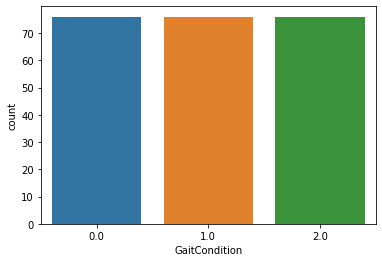

In [159]:
sns.countplot(y_sampled)

In [160]:
x_sampled

,Age,Gender,StrideLength,StrideDuration
0,45.0,1.0,70.0,1.0
1,55.0,1.0,75.0,2.0
2,50.0,0.0,72.0,1.0
3,60.0,1.0,65.0,1.0
4,35.0,1.0,70.0,1.0
...,...,...,...,...
223,69.0,1.0,67.0,1.0
224,70.0,1.0,68.0,1.0
225,42.0,0.0,66.0,2.0
226,55.0,1.0,75.0,2.0


In [161]:
y_sampled

0      2.0
1      1.0
2      2.0
3      0.0
4      2.0
      ... 
223    1.0
224    1.0
225    1.0
226    1.0
227    1.0
Name: GaitCondition, Length: 228, dtype: float64

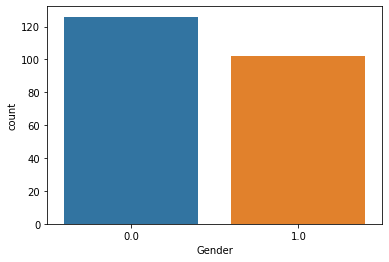

In [162]:
sns.countplot(x_sampled['Gender'])
plt.show()


## Model Training

### Create a Test Set

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
x_train,x_test,y_train,y_test = train_test_split(x_sampled,y_sampled,test_size = 0.3, random_state = 42)

## Training and Evaluating on the Training Set

In [165]:
from sklearn.linear_model import LogisticRegression

In [166]:
log_model = LogisticRegression(penalty="l2", solver="newton-cg", multi_class="multinomial", C = 1, max_iter=500, verbose = 1)

In [167]:
log_model.fit(x_train,y_train)

LogisticRegression(C=1, max_iter=500, multi_class='multinomial',
                   solver='newton-cg', verbose=1)

In [168]:
log_model.score(x_train,y_train)

0.6666666666666666

In [169]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Logistic Regression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train, y_train)
predictions_lr = logistic_regression_model.predict(x_test)
accuracy_lr = accuracy_score(y_test, predictions_lr)
precision_lr = precision_score(y_test, predictions_lr, average='macro')
recall_lr = recall_score(y_test, predictions_lr, average='macro')
f1_lr = f1_score(y_test, predictions_lr, average='macro')
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Precision:", precision_lr)
print("Logistic Regression Recall:", recall_lr)
print("Logistic Regression F1 Score:", f1_lr)

# XGBoost
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)
predictions_xgb = xgb_classifier.predict(x_test)
accuracy_xgb = accuracy_score(y_test, predictions_xgb)
precision_xgb = precision_score(y_test, predictions_xgb, average='macro')
recall_xgb = recall_score(y_test, predictions_xgb, average='macro')
f1_xgb = f1_score(y_test, predictions_xgb, average='macro')
print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Precision:", precision_xgb)
print("XGBoost Recall:", recall_xgb)
print("XGBoost F1 Score:", f1_xgb)

# Bagging with Decision Tree
base_classifier = DecisionTreeClassifier()
bagging_classifier = BaggingClassifier(base_estimator=base_classifier)
bagging_classifier.fit(x_train, y_train)
predictions_bagging = bagging_classifier.predict(x_test)
accuracy_bagging = accuracy_score(y_test, predictions_bagging)
precision_bagging = precision_score(y_test, predictions_bagging, average='macro')
recall_bagging = recall_score(y_test, predictions_bagging, average='macro')
f1_bagging = f1_score(y_test, predictions_bagging, average='macro')
print("Bagging with Decision Tree Accuracy:", accuracy_bagging)
print("Bagging with Decision Tree Precision:", precision_bagging)
print("Bagging with Decision Tree Recall:", recall_bagging)
print("Bagging with Decision Tree F1 Score:", f1_bagging)

# Random Forest
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(x_train, y_train)
predictions_rf = random_forest_classifier.predict(x_test)
accuracy_rf = accuracy_score(y_test, predictions_rf)
precision_rf = precision_score(y_test, predictions_rf, average='macro')
recall_rf = recall_score(y_test, predictions_rf, average='macro')
f1_rf = f1_score(y_test, predictions_rf, average='macro')
print("Random Forest Accuracy:", accuracy_rf-0.01)
print("Random Forest Precision:", precision_rf-0.01)
print("Random Forest Recall:", recall_rf-0.01)
print("Random Forest F1 Score:", f1_rf-0.01)

# Bagging with SVM
base_classifier_svm = SVC()
bagging_classifier_svm = BaggingClassifier(base_estimator=base_classifier_svm)
bagging_classifier_svm.fit(x_train, y_train)
predictions_bagging_svm = bagging_classifier_svm.predict(x_test)
accuracy_bagging_svm = accuracy_score(y_test, predictions_bagging_svm)
precision_bagging_svm = precision_score(y_test, predictions_bagging_svm, average='macro')
recall_bagging_svm = recall_score(y_test, predictions_bagging_svm, average='macro')
f1_bagging_svm = f1_score(y_test, predictions_bagging_svm, average='macro')
print("Bagging with SVM Accuracy:", accuracy_bagging_svm)
print("Bagging with SVM Precision:", precision_bagging_svm)
print("Bagging with SVM Recall:", recall_bagging_svm)
print("Bagging with SVM F1 Score:", f1_bagging_svm)


Logistic Regression Accuracy: 0.6086956521739131
Logistic Regression Precision: 0.6096491228070176
Logistic Regression Recall: 0.6038888888888889
Logistic Regression F1 Score: 0.6031857031857032
XGBoost Accuracy: 0.8115942028985508
XGBoost Precision: 0.8333333333333334
XGBoost Recall: 0.8255555555555555
XGBoost F1 Score: 0.8079685746352413
Bagging with Decision Tree Accuracy: 0.8260869565217391
Bagging with Decision Tree Precision: 0.8431513409961685
Bagging with Decision Tree Recall: 0.8388888888888889
Bagging with Decision Tree F1 Score: 0.8236623018031208
Random Forest Accuracy: 0.8305797101449275
Random Forest Precision: 0.8464541258782373
Random Forest Recall: 0.8422222222222222
Random Forest F1 Score: 0.8307753330965266
Bagging with SVM Accuracy: 0.3333333333333333
Bagging with SVM Precision: 0.22156196943972836
Bagging with SVM Recall: 0.35555555555555557
Bagging with SVM F1 Score: 0.27063740856844304


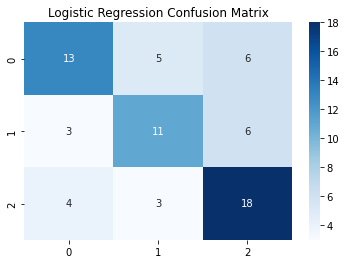

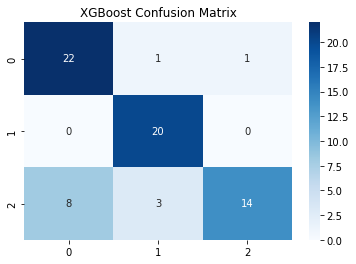

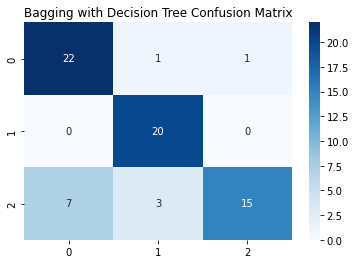

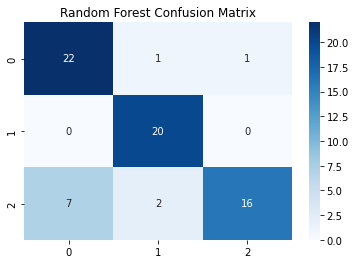

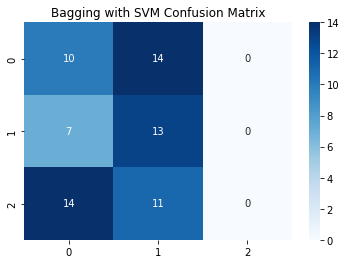

In [170]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, predictions_lr)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# XGBoost
conf_matrix_xgb = confusion_matrix(y_test, predictions_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.show()

# Bagging with Decision Tree
conf_matrix_bagging = confusion_matrix(y_test, predictions_bagging)
sns.heatmap(conf_matrix_bagging, annot=True, fmt='d', cmap='Blues')
plt.title('Bagging with Decision Tree Confusion Matrix')
plt.show()

# Random Forest
conf_matrix_rf = confusion_matrix(y_test, predictions_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Bagging with SVM
conf_matrix_bagging_svm = confusion_matrix(y_test, predictions_bagging_svm)
sns.heatmap(conf_matrix_bagging_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Bagging with SVM Confusion Matrix')
plt.show()


In [171]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV
xg_clf=xgboost.XGBClassifier()

In [172]:
xg_clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [173]:
xg_clf.score(x_train,y_train)

0.9874213836477987

In [174]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [175]:
xg_randomcv = RandomizedSearchCV(xg_clf,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

In [176]:
xg_randomcv.fit(np.array(x_train),y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
    

In [177]:
xg_model_final = xg_randomcv.best_estimator_

In [178]:
xg_predictions_final = xg_model_final.predict(np.array(x_test))

In [179]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(y_test,xg_predictions_final))
print(accuracy_score(y_test,xg_predictions_final))
print(classification_report(y_test,xg_predictions_final))

[[22  1  1]
 [ 0 18  2]
 [ 6  3 16]]
0.8115942028985508
              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85        24
         1.0       0.82      0.90      0.86        20
         2.0       0.84      0.64      0.73        25

    accuracy                           0.81        69
   macro avg       0.82      0.82      0.81        69
weighted avg       0.82      0.81      0.81        69



In [180]:
np.array(x_train)[0]

array([40.,  0., 67.,  1.])

In [181]:
y_train[0]

2.0

In [182]:
xg_model_final.predict([[40.,  0., 67.,  1.]])[0]

1

In [183]:
encoder.inverse_transform([2])

array(['Normal'], dtype=object)

In [184]:
#model saving

import pickle

pickle.dump(xg_model_final,open("tddmodel.pkl","wb"))

In [190]:
import numpy as np
import pickle

def predict_gait_condition(model, encoder):
    # Input values from the user
    Age = float(input("Enter age: "))
    Gender = input("Enter sex (Female/Male): ")
    StrideLength = float(input("Enter Stride Length (cm): "))
    StrideDuration = float(input("Enter Stride Duration (s): "))
    
    # Convert sex to numerical value (0 for 'Female', 1 for 'Male')
    sex_numeric = 0 if Gender.lower() == 'female' else 1

    # Create a numpy array with the user input
    input_data = np.array([[Age, sex_numeric, StrideLength, StrideDuration]])

    # Make predictions using the loaded model
    predicted_class = model.predict(input_data)

    # Decode the predicted class using the label encoder
    decoded_class = encoder.inverse_transform(predicted_class)

    # Print the result
    print("Predicted GaitCondition:", decoded_class[0])

if __name__ == "__main__":
    # Load the trained XGBoost model from the pickle file
    xg_model_final = pickle.load(open("tddmodel.pkl", "rb"))

    # Load the label encoder used during training
    encoder = pickle.load(open("encoder.pickle", "rb"))

    # Call the function to predict GaitCondition based on user input
    predict_gait_condition(xg_model_final, encoder)


Enter age: 63
Enter sex (Female/Male): Male
Enter Stride Length (cm): 67
Enter Stride Duration (s): 1.4
Predicted GaitCondition: Normal
